<center><img src="https://i.imgur.com/zRrFdsf.png" width="700"></center>

<a target="_blank" href="https://colab.research.google.com/github/CienciaDeDatosEspacial/TheThematics/blob/main/index.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# The Thematic map

Last session we created a file with several layers:

In [1]:
import geopandas as gpd

linkGit='https://github.com/20232059/MEXICO/raw/refs/heads/main/'
linkWorldMaps='MEX_FEDERACIONES_1.gpkg'

we can easily find out the layers in that geopackage file (**worldMaps.gpkg**):

In [2]:
gpd.list_layers(linkGit+linkWorldMaps.replace(' ','%20'))

,name,geometry_type
0,MEX_FEDERACIONES_1,MultiPolygon


For the thematics we will retrieve only one layer (map):

In [3]:
federaciones=gpd.read_file(linkGit+linkWorldMaps.replace(' ','%20'),layer='MEX_FEDERACIONES_1')

# see some
federaciones

,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry
0,MEX.1_1,MEX,México,Aguascalientes,NA,NA,Estado,State,NA,MX.AG,MX-AGU,"MULTIPOLYGON (((-102.06593 21.79343, -102.0659..."
1,MEX.3_1,MEX,México,Baja California,NA,NA,Estado,State,NA,MX.BN,MX-BCN,"MULTIPOLYGON (((-114.12282 28.00795, -114.1219..."
2,MEX.2_1,MEX,México,Baja California Sur,NA,NA,Estado,State,NA,MX.BS,MX-BCS,"MULTIPOLYGON (((-109.91041 22.8795, -109.91027..."
3,MEX.4_1,MEX,México,Campeche,NA,NA,Estado,State,NA,MX.CM,MX-CAM,"MULTIPOLYGON (((-91.8393 18.32335, -91.83908 1..."
4,MEX.5_1,MEX,México,Chiapas,NA,NA,Estado,State,NA,MX.CP,MX-CHP,"MULTIPOLYGON (((-92.4664 14.75755, -92.4692 14..."
5,MEX.6_1,MEX,México,Chihuahua,NA,NA,Estado,State,NA,MX.CH,MX-CHH,"MULTIPOLYGON (((-106.42579 26.17839, -106.4156..."
6,MEX.7_1,MEX,México,Coahuila,Coahuila de Zaragoza,NA,Estado,State,NA,MX.CA,NA,"MULTIPOLYGON (((-100.80706 25.13002, -100.8071..."
7,MEX.8_1,MEX,México,Colima,NA,NA,Estado,State,NA,MX.CL,MX-COL,"MULTIPOLYGON (((-114.70972 18.36134, -114.7051..."
8,MEX.9_1,MEX,México,Distrito Federal,NA,NA,Distrito Federal,Federal District,NA,MX.DF,NA,"MULTIPOLYGON (((-98.96683 19.20896, -98.96686 ..."
9,MEX.10_1,MEX,México,Durango,NA,NA,Estado,State,NA,MX.DU,MX-DUR,"MULTIPOLYGON (((-104.17274 23.06002, -104.1728..."


As you see, the GDF above has just two colums; enough to plot a map, but no more than that.

Let me open a DF:

In [4]:
import pandas as pd

someDataLink='DATOS_DE_MEXICO.csv'
someData=pd.read_csv(linkGit+someDataLink.replace(' ','%20'), encoding='latin-1')

## data available
someData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 1 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   FEDERACIONES;POBLACION_TOTAL;AREA  32 non-null     object
dtypes: object(1)
memory usage: 388.0+ bytes


## Pre Processing: Merging

The DF has some interesting numerical data (_float64_):
* fragility: fragility index 2023 -[details here](https://fragilestatesindex.org/2023/06/14/fragile-states-index-2023-annual-report/)
* co2: metric tonnes of CO2 emmitted -[details here](https://www.cia.gov/the-world-factbook/field/carbon-dioxide-emissions/country-comparison/)
* sq_km: country area -[details here](https://www.cia.gov/the-world-factbook/field/area/country-comparison/)
* num_airports: count of airports in the country -[details here](https://www.cia.gov/the-world-factbook/field/airports/country-comparison/)
* population: country population  -[details here](https://www.cia.gov/the-world-factbook/field/population/country-comparison/)
* mobiles: total number of mobile cellular telephone subscribers -[details here](https://www.cia.gov/the-world-factbook/field/telephones-mobile-cellular/country-comparison/)

There are also other columns that may be of help:

In [5]:
someData.head()

,FEDERACIONES;POBLACION_TOTAL;AREA
0,Aguascalientes;1425607;5616
1,Baja California;3769020;71450
2,Baja California Sur;798447;73909
3,Campeche;928363;57507
4,Coahuila de Zaragoza;3146771;151562


In [6]:
##CODIGO PARA SEPARAR LA COLUMNA EN TRES PARTES: FEDERACIONES, POBLACION_TOTAL Y AREA
##PUESTO QUE EL ARCHIVO CSV AL SER SUBIDO A LA NUBE FUE RECONOCIDO COMO SI TUVIERA UNA SOLA COLUMNA
someData = pd.read_csv("https://github.com/20232059/MEXICO/raw/refs/heads/main/DATOS_DE_MEXICO.csv", sep=";", encoding='latin1')
someData.head()

,FEDERACIONES,POBLACION_TOTAL,AREA
0,Aguascalientes,1425607,5616
1,Baja California,3769020,71450
2,Baja California Sur,798447,73909
3,Campeche,928363,57507
4,Coahuila de Zaragoza,3146771,151562


Preparing thematic maps requires **social data** _about_ the geometry (line, polygon, point). The object **countries** has no social data, so the preprocessing requires geomerging.

### Geo Merging

This is a critical preprocessing operation, as it is in charge of combining data sets, in this case combine a DF into a GDF. Some rules are needed:

* There is at least one common column needed to serve for the matches.
* The common columns, or KEYs, need contents to be written exactly in both columns.
* It is recommended that both KEYs are named the same.

Here we have the KEYs:

In [7]:
##ESTA ES LA DATA OBTENIDA DEL MAPA Y MERGEADA CON LA DATA DEL CSV
federaciones.NAME_1.head()

,NAME_1
0,Aguascalientes
1,Baja California
2,Baja California Sur
3,Campeche
4,Chiapas


In [8]:
##ESTA ES LA DATA QUE SE OBTUVO DEL CSV
someData.FEDERACIONES.head()

,FEDERACIONES
0,Aguascalientes
1,Baja California
2,Baja California Sur
3,Campeche
4,Coahuila de Zaragoza


Let's solve the _country name_ differences for the KEYs:

In [9]:
federaciones.rename(columns={'NAME_1':'FEDERACIONES'},inplace=True)

We can notice the different *case* in the KEYs. Let's work with uppercases:

In [10]:
##NO SERÍA NECESARIO CONVERTIR FEDERACIONES A MAYÚSCULA PORQUE AMBAS PARTES DE LA DATA COINCIDEN
##federaciones['ESTADOS']=federaciones.ESTADOS.str.upper()

In [11]:
!pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 5.9 MB/s eta 0:00:00


In [12]:
#O SI SE QUIERE COMPARAR ANALÍTICAMENTE, SE CONVIERTE EN MAYÚSCULA TANTO LA DATA DEL MAPA COMO LA DEL CSV
import unidecode
federaciones['FEDERACIONES']=federaciones.FEDERACIONES.str.upper()
someData['FEDERACIONES'] = someData['FEDERACIONES'].str.upper().str.strip().apply(unidecode.unidecode)


It is very unlikely the names are written the same. Let's verify:

In [13]:
##SE HACE UNA DIFERENCIA ENTRE LAS FEDERACIONES QUE ESTÁN EN EL MAPA Y LOS QUE NO
onlyDF=set(someData.FEDERACIONES)- set(federaciones.FEDERACIONES)
onlyGDF=set(federaciones.FEDERACIONES)- set(someData.FEDERACIONES)

Check here:

In [14]:
onlyDF # they did not find a match in the MAP GDF!

{'COAHUILA DE ZARAGOZA',
 'MAXICO',
 'MICHOACAN DE OCAMPO',
 'NUEVO LEAN',
 'QUERATARO',
 'SAN LUIS POTOSA',
 'VERACRUZ DE IGNACIO DE LA LLAVE',
 'YUCATAN'}

There are several countries in the DF that did not find a match in the GDF (map). Of course, most of them are in the map, let's see why they were not matched.

### Fuzzy merging

We use this technique to detect similarities between strings. You need this package **thefuzz** (based on the [Levenshtein algorithm](https://en.wikipedia.org/wiki/Levenshtein_distance)):

In [15]:
pip install thefuzz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 21.5 MB/s eta 0:00:00


This is the basic idea:

In [16]:
from thefuzz.process import extractOne as best

## find the BEST match to 'BAHAMAS (THE)'
## from all strings in 'onlyGDF'

best('BAHAMAS (THE)',onlyGDF)

('COAHUILA', 45)

As you see, you get a coefficient value of 90 (the closer to 100 the better). That may be a reliable result.

Let's do the same for all the unmatched countries:

In [17]:
## for each country in onlyDF, find the BEST match in onlyGDF

[(FEDERACIONES, best(FEDERACIONES,onlyGDF)) for FEDERACIONES in onlyDF]

[('MAXICO', ('MÉXICO', 91)),
 ('QUERATARO', ('QUERÉTARO', 94)),
 ('SAN LUIS POTOSA', ('SAN LUIS POTOSÍ', 97)),
 ('NUEVO LEAN', ('NUEVO LEÓN', 95)),
 ('VERACRUZ DE IGNACIO DE LA LLAVE', ('VERACRUZ', 90)),
 ('YUCATAN', ('YUCATÁN', 92)),
 ('COAHUILA DE ZARAGOZA', ('COAHUILA', 90)),
 ('MICHOACAN DE OCAMPO', ('MICHOACÁN', 84))]

Each element in the *list* above in in parentheses, for instance:

```
('TIMOR-LESTE', ('EAST TIMOR', 81))
```

That element has two elements:


*   **'TIMOR-LESTE'** from *onlyDF*, and
*   **('EAST TIMOR', 81)** which is the result from _best(country,onlyGDF)_. This last element, as we just saw above, shows the best match and the level of similarity (the higher the more similar).

We can prepare a list where each element has three elements:



In [18]:
#or
[(FEDERACIONES, best(FEDERACIONES,onlyGDF)[0],best(FEDERACIONES,onlyGDF)[1]) for FEDERACIONES in onlyDF]

[('MAXICO', 'MÉXICO', 91),
 ('QUERATARO', 'QUERÉTARO', 94),
 ('SAN LUIS POTOSA', 'SAN LUIS POTOSÍ', 97),
 ('NUEVO LEAN', 'NUEVO LEÓN', 95),
 ('VERACRUZ DE IGNACIO DE LA LLAVE', 'VERACRUZ', 90),
 ('YUCATAN', 'YUCATÁN', 92),
 ('COAHUILA DE ZARAGOZA', 'COAHUILA', 90),
 ('MICHOACAN DE OCAMPO', 'MICHOACÁN', 84)]

For instace, this element has 3 elements:

```
 ('IRAN (ISLAMIC REPUBLIC OF)', 'IRAN', 90)
```

The level of similarity would guide us to make update (replace) the strings in one of the KEYs, so that the merging process works properly.

Then, it would be better if we have a data frame instead of a list:

In [19]:
pd.DataFrame([(FEDERACIONES, best(FEDERACIONES,onlyGDF)[0],best(FEDERACIONES,onlyGDF)[1]) for FEDERACIONES in onlyDF])

,0,1,2
0,MAXICO,MÉXICO,91
1,QUERATARO,QUERÉTARO,94
2,SAN LUIS POTOSA,SAN LUIS POTOSÍ,97
3,NUEVO LEAN,NUEVO LEÓN,95
4,VERACRUZ DE IGNACIO DE LA LLAVE,VERACRUZ,90
5,YUCATAN,YUCATÁN,92
6,COAHUILA DE ZARAGOZA,COAHUILA,90
7,MICHOACAN DE OCAMPO,MICHOACÁN,84


Let's sort by the column '2' (the third):

In [20]:
pd.DataFrame([(FEDERACIONES, best(FEDERACIONES,onlyGDF)[0],best(FEDERACIONES,onlyGDF)[1]) for FEDERACIONES in onlyDF]).sort_values(by=2)

,0,1,2
7,MICHOACAN DE OCAMPO,MICHOACÁN,84
4,VERACRUZ DE IGNACIO DE LA LLAVE,VERACRUZ,90
6,COAHUILA DE ZARAGOZA,COAHUILA,90
0,MAXICO,MÉXICO,91
5,YUCATAN,YUCATÁN,92
1,QUERATARO,QUERÉTARO,94
3,NUEVO LEAN,NUEVO LEÓN,95
2,SAN LUIS POTOSA,SAN LUIS POTOSÍ,97


The previous result helps make a plan based on these cases:
* **ESWATINI** is always a problem, because it is also *SWAZILAND*.
* **KOREA (THE REPUBLIC OF)** is not _NORTH KOREA_.
* **LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)** is too long to match *LAOS* (if it exists in the map like that).
* **SAMOA** is always a problem, because it is also *WESTERN SAMOA*.

Based on this, we should see what our GDF has:

In [21]:
##MODIFICA LOS ÍNDICES DE MENOR A MAYOR
federaciones.FEDERACIONES[federaciones.FEDERACIONES.str.contains('MICHOACÁN|COAHUILA|VERACRUZ|MÉXICO|YUCATÁN|QUERÉTARO|NUEVO LEÓN|SAN LUIS POTOSÍ')]

,FEDERACIONES
6,COAHUILA
14,MÉXICO
15,MICHOACÁN
18,NUEVO LEÓN
21,QUERÉTARO
23,SAN LUIS POTOSÍ
29,VERACRUZ
30,YUCATÁN


Then, it makes sense to change those manually (notice the 'replace' uses Python dictionaries):

In [22]:
# this is a {dictionary}

manualChanges={'COAHUILA DE ZARAGOZA':'COAHUILA',
               'MAXICO':"MÉXICO",
               'YUCATAN':'YUCATÁN',
               'VERACRUZ DE IGNACIO DE LA LLAVE':'VERACRUZ',
               'NUEVO LEAN':'NUEVO LEÓN',
               'QUERATARO':'QUERÉTARO',
               'MICHOACAN DE OCAMPO':'MICHOACÁN',
               'SAN LUIS POTOSA':'SAN LUIS POTOSÍ',
              }

someData.replace(to_replace={'FEDERACIONES':manualChanges},inplace=True)

At this stage, we should recompute the differences:

In [23]:
# updating
onlyDF=set(someData.FEDERACIONES)- set(federaciones.FEDERACIONES)
onlyGDF=set(federaciones.FEDERACIONES)- set(someData.FEDERACIONES)

An re run this code:

In [24]:
print(onlyDF)
print(onlyGDF)

set()
set()


In [25]:
##ESO SIGNIFICA QUE LA DATA DE "SomeData.FEDERACIONES" ES LA MISMA QUE "federaciones.FEDERACIONES",
##POR LO QUE AL FINAL NO SE TENDRÁ NINGÚN VALOR QUE NO COINCIDA

In [26]:
# keeping high scores
##AQUÍ NO SE MUESTRA NINGÚN VALOR PARA CLASIFICARLO SEGÚN SU PUNTAJE MAYOR, PORQUE YA NO HAY FEDERACIONES QUE TENGAN DIFERENCIAS;
##POR LO TANTO,NO HAY NADA QUE ORGANIZAR
pd.DataFrame([(FEDERACIONES, best(FEDERACIONES,onlyGDF)[0],best(FEDERACIONES,onlyGDF)[1]) for FEDERACIONES in onlyDF])

""


All this is correct now!

Let's prepare the changes:

In [27]:
##NO HAY NADA POR CORREGIR
# new {dictionary}
changesToDF={FEDERACIONES: best(FEDERACIONES,onlyGDF)[0] for FEDERACIONES in onlyDF}
changesToDF

{}

In [28]:
##NO SERÍA NECESARIO REALIZARLO
someData.replace(to_replace={'FEDERACIONES':changesToDF},inplace=True)

What is left to match?

In [29]:
# updating
##NO HAY NADA POR CORREGIR
onlyDF=set(someData.FEDERACIONES)- set(federaciones.FEDERACIONES)
onlyGDF=set(federaciones.FEDERACIONES)- set(someData.FEDERACIONES)
[(FEDERACIONES, best(FEDERACIONES,onlyGDF)) for FEDERACIONES in onlyDF]

[]

Once you are here, merging can proceed:

In [30]:
## GDF to the 'left'
theMapAndData=federaciones.merge(someData, on='FEDERACIONES')

And our GDF has social data now!

In [31]:
theMapAndData.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   GID_1            32 non-null     object  
 1   GID_0            32 non-null     object  
 2   COUNTRY          32 non-null     object  
 3   FEDERACIONES     32 non-null     object  
 4   VARNAME_1        32 non-null     object  
 5   NL_NAME_1        32 non-null     object  
 6   TYPE_1           32 non-null     object  
 7   ENGTYPE_1        32 non-null     object  
 8   CC_1             32 non-null     object  
 9   HASC_1           32 non-null     object  
 10  ISO_1            32 non-null     object  
 11  geometry         32 non-null     geometry
 12  POBLACION_TOTAL  32 non-null     int64   
 13  AREA             32 non-null     int64   
dtypes: geometry(1), int64(2), object(11)
memory usage: 3.6+ KB


We should save this map of countries and their indicators in a new file:

In [32]:
theMapAndData.to_file("worldindicators.json")

# Thematics: the DDM (Dot Density Map)

You have a DDM if you use dot to show comparatively which polygon of a map has 'more' (or 'less') of some countable phenomenon of interest.
A dot is an aggregated value, but it is constant for each dot.

We have the world map, let's keep Africa:

In [33]:
##SE MODIFICÓ : SE USÓ CON EL FIN DE QUE NO CUENTE LA CANTIDAD DE COLUMNAS DE CIERTA CATEGORÍA PORQUE SOLO SON TRES COLUMNAS,
##EN EL CASO DE POBLACION_TOTAL, APARECÍA SOLO LA CANTIDAD (EN NÚMEROS) DE PERSONAS EN UNA FEDERACIÓN Y AL LADO EL NÚMERO 1;
##EN EL CASO DE FEDERACIONES, APARECÍA EL NOMBRE DE LA FEDERACIÓN Y AL COSTADO UN 1
##theMapAndData.FEDERACIONES.value_counts()
theMapAndData.groupby("FEDERACIONES")["POBLACION_TOTAL"].sum()

,POBLACION_TOTAL
FEDERACIONES,
AGUASCALIENTES,1425607
BAJA CALIFORNIA,3769020
BAJA CALIFORNIA SUR,798447
CAMPECHE,928363
CHIAPAS,5543828
CHIHUAHUA,3741869
COAHUILA,3146771
COLIMA,731391
DISTRITO FEDERAL,9209944


### Preprocessing: Filtering

<Axes: >

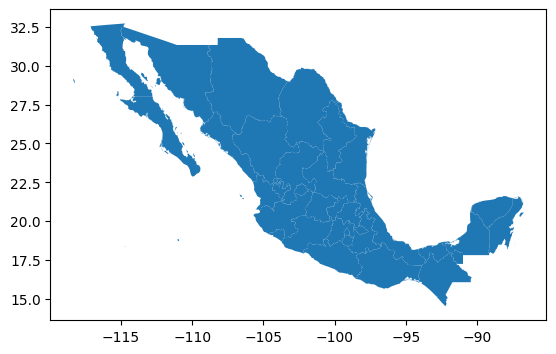

In [34]:
# then
#PLOT DEL MAPA
MEXICO=theMapAndData
MEXICO.plot()

A DDM can serve as an effective way to show the distribution of people. The most critical tasks are:

* Dot Placement: The dots should be randomly distributed within each polygon to avoid misrepresenting the data.

* Dot Unit: Deciding how many people each dot should represent is key for visual clarity. This value should be chosen carefully to avoid oversaturation or sparsity.

The size of all dots on the map must be the same to ensure a consistent visual comparison.

### Preprocessing: aggregating

This is a DOT UNIT proposal:

In [35]:
##SE CREA JUSTDOTS PARA NO MODIFICAR MEXICO Y SE DIVIDE LA DATA DE POBLACION_TOTAL ENTRE 10000 (CADA PUNTO VALE 10000 PERSONAS)
justDots=MEXICO.copy()
##SE UTILIZA DIEZ MIL Y NO CIEN MIL COMO EL EJERCICIO REALIZADO EN CLASE, PUESTO QUE LOS PUNTOS EN EL MAPA NO SON MUY NOTORIOS
##¿CUÁNTOS PUNTOS VOY A TENER?
dot_value = 10000
justDots['num_dots'] = (justDots['POBLACION_TOTAL'] / dot_value).astype(int)

### Preprocessing: distributing dots

And here, we get a location for the dots:

In [36]:
##SE CREA LA GEOGRAFÍA DE PUNTOS
##SE GENERA ESA CANTIDAD DE PUNTOS
# 2. Generate the random dot locations using .sample_points()
justDots = justDots.sample_points(size=justDots['num_dots']).explode(index_parts=True)

You get this:

In [37]:
justDots

0   0      POINT (-102.83861 21.84969)
    1        POINT (-102.834 21.89433)
    2       POINT (-102.82015 21.8818)
    3      POINT (-102.81742 21.82476)
    4      POINT (-102.81614 21.82307)
                      ...             
31  157     POINT (-101.2418 24.38702)
    158    POINT (-101.23775 23.91405)
    159     POINT (-101.2217 24.73878)
    160     POINT (-101.1124 24.55144)
    161    POINT (-101.05103 24.38022)
Name: sampled_points, Length: 12586, dtype: geometry

In [38]:
# what is it?
type(justDots)

geopandas.geoseries.GeoSeries

### Preprocessing: building GDF from GS

Notice the multi index (MI), one for a country and for a dot. As we are planing to send these points to R, we avoid MI:

In [39]:
##SE CREA EL DataFrame DE MEXICO
justDots.reset_index(drop=True, inplace=True)
MEXICO_dots=gpd.GeoDataFrame(geometry=justDots)
MEXICO_dots

,geometry
0,POINT (-102.83861 21.84969)
1,POINT (-102.834 21.89433)
2,POINT (-102.82015 21.8818)
3,POINT (-102.81742 21.82476)
4,POINT (-102.81614 21.82307)
...,...
12581,POINT (-101.2418 24.38702)
12582,POINT (-101.23775 23.91405)
12583,POINT (-101.2217 24.73878)
12584,POINT (-101.1124 24.55144)


Now you have a GDF:

In [40]:
MEXICO_dots.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 12586 entries, 0 to 12585
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geometry  12586 non-null  geometry
dtypes: geometry(1)
memory usage: 98.5 KB


Juts plot the polygons as the base, and the points as the layer on top!

<Axes: >

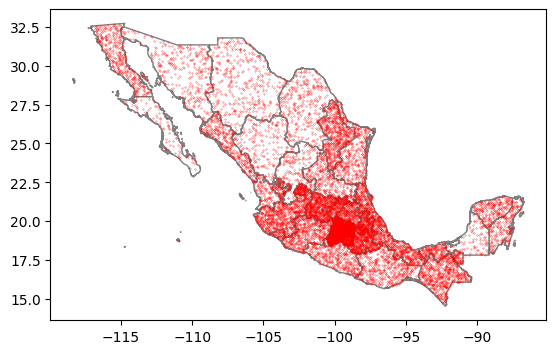

In [41]:
#SIN PROYECTAR
base=MEXICO.plot(facecolor="white",#color of polygon fill
               edgecolor='grey') #color of border
MEXICO_dots.plot(markersize=0.05, color='red',ax=base)

It is generally recommended that DDMs use an **equal-area projection**, which benefits density and limits area distortion.

<Axes: >

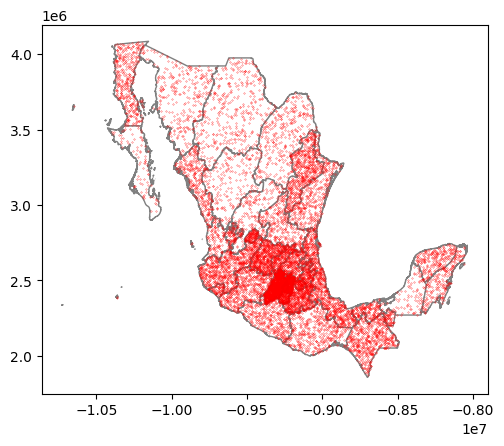

In [42]:
##PROYECCIÓN RECOMENDADA
# base: mapa de México con polígonos en blanco y bordes grises
base = MEXICO.to_crs(8857).plot(facecolor="white",   # mapa en blanco
                                 edgecolor="grey")   # bordes de los estados

# puntos dispersos encima
MEXICO_dots.to_crs(8857).plot(ax=base,color="red",markersize=0.05)

Let's keep the continent countries with that crs:

In [43]:
MEXICO_8857=MEXICO.to_crs(8857)
MEXICO_dots_8857=MEXICO_dots.to_crs(8857)

# Thematics: the PSM (Proportional Symbol Map)

You have a PSM if you use a symbol (generally a circle) to show the distribution of a variable per location.
The symbol is an aggregated raw value, and its size varies according to those values. So now we need:

### Preprocessing: GDF of centroids

1. A location for a symbol, generally the polygon centroid.

In [44]:
##proyección de centroides
MEXICO_8857_centroids = MEXICO_8857.copy()

# MEXICO_8857_centroids will have a new geometry:
MEXICO_8857_centroids['geometry'] = MEXICO_8857_centroids['geometry'].centroid

2. A size of varying values (not constant as in DDMs). Let's use population again.

In [45]:
##TAMAÑO DEL CENTROIDE SEGÚN LA POBLACIÓN
MEXICO_8857_centroids['size'] = MEXICO_8857_centroids['POBLACION_TOTAL'].apply(lambda x: x**0.5/100)

## or
# import numpy as np
# MEXICO_8857_centroids['size'] = MEXICO_8857_centroids['POBLACION_TOTAL'].apply(lambda x: np.log10(x))

We got the basics, then:

<Axes: >

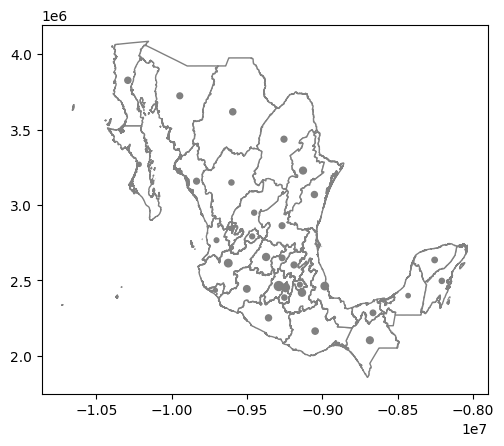

In [46]:
base=MEXICO_8857.plot(facecolor="white",
                      edgecolor='grey')
# Plot the centroids on top
MEXICO_8857_centroids.plot(
    ax=base,
    markersize=MEXICO_8857_centroids['size'],
    color='grey'
)

In [47]:
##NO SE INSTALÓ "mapclassify", PORQUE NO FUE NECESARIO UBICAR EL PUNTO REPRESENTATIVO DE LAS FEDERACIONES
##PARA ESTE CASO, COMO SIEMPRE ESTARÁ EN EL CENTROIDE, NO SE SALDRÁ DEL TERRITORIO

### Preprocessing: Computing new columns

PPMs are not thematic maps to see precise values, but to reveal clear differences on the variable distribution used. As, human eyes are very limited to detect area differences, we may need to use some other tactics to help uncover some patterns.

For example, let's confirm if we have outliers:

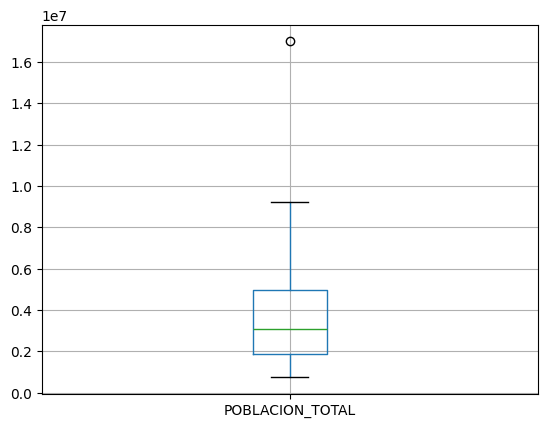

In [48]:
boxplotInfo=MEXICO_8857_centroids.boxplot(column='POBLACION_TOTAL',return_type="dict")

The object **boxplotInfo** showed the boxplot, and we confirm there are outliers. We can recover them like this:

In [49]:
##VALORES ATÍPICOS
## VALORES DE LAS FEDERACIONES QUE TIENE UN GRAN CANTIDAD DE POBLACIÓN
outliers=boxplotInfo['fliers'][0].get_ydata()
## see
outliers

array([16992418], dtype=object)

Then, these are the outlying countries:

In [50]:
##INFORMACIÓN DE LA FEDERACIÓN CON MÁS POBLACIÓN
MEXICO_8857_centroids[MEXICO_8857_centroids.POBLACION_TOTAL.isin(outliers)]

,GID_1,GID_0,COUNTRY,FEDERACIONES,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry,POBLACION_TOTAL,AREA,size
14,MEX.15_1,MEX,México,MÉXICO,NA,NA,Estado,State,NA,MX.MX,NA,POINT (-9289273.195 2462939.297),16992418,22351,41.221861


Knowing this information, we can create a column as outlier flag:

In [51]:
##VALOR 1: ATÍPICO
##VALOR 0: NO ATÍPICO
MEXICO_8857_centroids['POBLACION_TOTAL_outlier']=MEXICO_8857_centroids.POBLACION_TOTAL.isin(outliers)*1

## see
MEXICO_8857_centroids

,GID_1,GID_0,COUNTRY,FEDERACIONES,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry,POBLACION_TOTAL,AREA,size,POBLACION_TOTAL_outlier
0,MEX.1_1,MEX,México,AGUASCALIENTES,NA,NA,Estado,State,NA,MX.AG,MX-AGU,POINT (-9465857.843 2792297.371),1425607,5616,11.939879,0
1,MEX.3_1,MEX,México,BAJA CALIFORNIA,NA,NA,Estado,State,NA,MX.BN,MX-BCN,POINT (-10290492.105 3827690.05),3769020,71450,19.413964,0
2,MEX.2_1,MEX,México,BAJA CALIFORNIA SUR,NA,NA,Estado,State,NA,MX.BS,MX-BCS,POINT (-10215899.388 3270103.363),798447,73909,8.935586,0
3,MEX.4_1,MEX,México,CAMPECHE,NA,NA,Estado,State,NA,MX.CM,MX-CAM,POINT (-8431541.56 2399296.14),928363,57507,9.635160,0
4,MEX.5_1,MEX,México,CHIAPAS,NA,NA,Estado,State,NA,MX.CP,MX-CHP,POINT (-8685188.84 2103322.86),5543828,73311,23.545335,0
5,MEX.6_1,MEX,México,CHIHUAHUA,NA,NA,Estado,State,NA,MX.CH,MX-CHH,POINT (-9594626.224 3618621.728),3741869,247455,19.343911,0
6,MEX.7_1,MEX,México,COAHUILA,Coahuila de Zaragoza,NA,Estado,State,NA,MX.CA,NA,POINT (-9254981.391 3437043.77),3146771,151562,17.739140,0
7,MEX.8_1,MEX,México,COLIMA,NA,NA,Estado,State,NA,MX.CL,MX-COL,POINT (-9710285.779 2435112.457),731391,5627,8.552140,0
8,MEX.9_1,MEX,México,DISTRITO FEDERAL,NA,NA,Distrito Federal,Federal District,NA,MX.DF,NA,POINT (-9244202.712 2453228.225),9209944,1495,30.347890,0
9,MEX.10_1,MEX,México,DURANGO,NA,NA,Estado,State,NA,MX.DU,MX-DUR,POINT (-9603496.029 3149760.389),1832650,123317,13.537540,0


We can use that like this:

<Axes: >

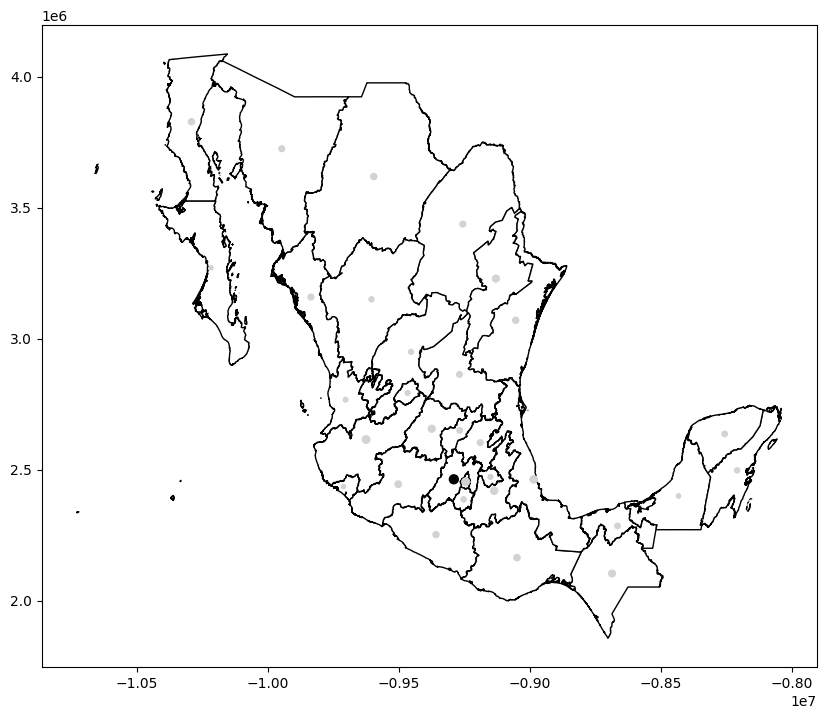

In [52]:
base = MEXICO_8857.plot(color='white', edgecolor='black', figsize=(10,10))

# Define your color map
mapcolor = {1: 'black', 0: 'lightgrey'}

# Plot the centroids on top
MEXICO_8857_centroids.plot(
    ax=base,
    markersize=MEXICO_8857_centroids['size'],
    color=MEXICO_8857_centroids['POBLACION_TOTAL_outlier'].map(mapcolor)
)

##EL CÍRCULO DE COLOR NEGRO REPRESENTA LA FEDERACIÓN CON MAYOR CANTIDAD DE POBLACIÓN EN MÉXICO

Here, we do a good job for outliers, but it is difficult to interprete the other ones. We could use some redundancy, but more work is needed:
1. Create two maps of centroids:

In [53]:
##MAPA DE CENTROIDES
# Create explicit copies of the DataFrames
MEXICO_8857_centroids_out = MEXICO_8857_centroids[MEXICO_8857_centroids.POBLACION_TOTAL_outlier==1].copy()
MEXICO_8857_centroids_no_out = MEXICO_8857_centroids[MEXICO_8857_centroids.POBLACION_TOTAL_outlier==0].copy()


2. Compute sizes in each:

In [54]:
##CALCULO DEL TAMAÑO
MEXICO_8857_centroids_out['size'] = MEXICO_8857_centroids_out['POBLACION_TOTAL'].apply(lambda x: x**0.5 / 50)
MEXICO_8857_centroids_no_out['size'] = MEXICO_8857_centroids_no_out['POBLACION_TOTAL'].apply(lambda x: x**0.5 / 50)

Now, plot the three layers, using some color gradient for the non-outliers:

<Axes: >

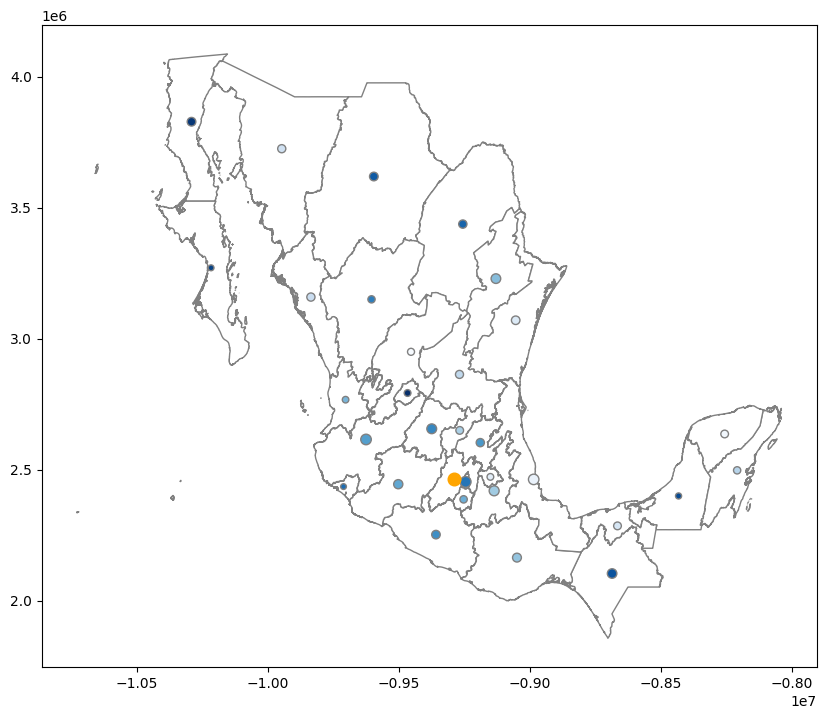

In [55]:
base=MEXICO_8857.plot(color='white', edgecolor='grey',figsize=(10,10))

MEXICO_8857_centroids_no_out.plot(
    ax=base,
    markersize=MEXICO_8857_centroids_no_out['size'],
    edgecolor='grey',
    c=MEXICO_8857_centroids_no_out['size'],
    cmap='Blues_r'
)
MEXICO_8857_centroids_out.plot(
    ax=base,
    markersize=MEXICO_8857_centroids_out['size'],
    color='orange'
)
##ATÍPICOS: DE UN SOLO COLOR
##TÍPICOS: CON COLORES DEGRADADOS

# Thematics: Choropleths

Notice that the DDMs may use aggregated counts, and the PSMs use the variables in its original form. Choropleths will 'paint' the whole polygon and as noticed in PSMs, we have to be very careful when using color in shape, as the area itself is a confounding. To control this visual artifact, the variable must be normalized, that is, divided by a value correlated with the area.

Then, for this course, a choropleth is a normalized representation of data.

Following our definition:

* This is **NOT** a choropleth:


<Axes: >

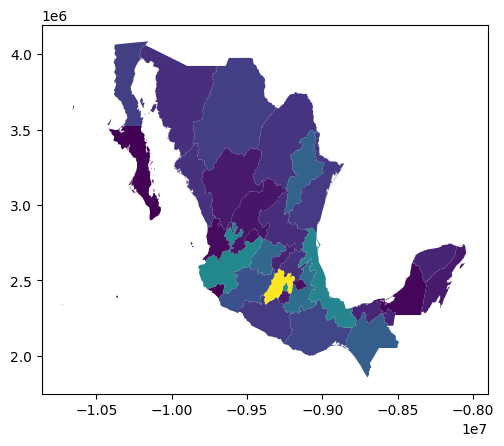

In [56]:
##NO ES CLOROPLETH
MEXICO_8857.plot(MEXICO_8857.POBLACION_TOTAL)

* * This **IS** a choropleth:

<Axes: >

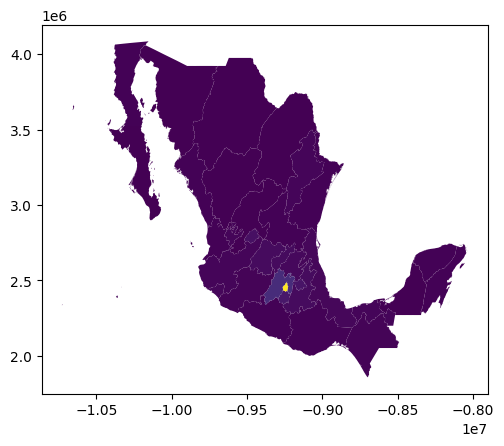

In [57]:
##SÍ ES CLOROPLETH PORQUE SE ESPECIFICA LA CANTIDAD DE POBLACIÓN DE LAS FEDERACIONES EN MÉXICO POR KM^2
MEXICO_8857.plot(MEXICO_8857.POBLACION_TOTAL/MEXICO_8857.AREA)

Choropleths are great to represent normalized indicators such as:
* Densities
* Ratios
* Rates
* Averages

Population by area is a density indicator. This is a real number (not an integer), so most of the time the color gradient might  not be
that useful to reveal some pattern visually. Then, we often discretize (or bin) the indicator computed.

### Preprocessing: Discretizing

Now, we want to cut the variable. Run the next code to make sure you have tose packages:

In [58]:
## do you have these installed?
# ! pip show numba mapclassify numpy

We will discretize this:

In [59]:
MEXICO_8857['POBLACION_TOTAL_density']=MEXICO_8857.POBLACION_TOTAL/MEXICO_8857.AREA

In [60]:
!pip install mapclassify

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.2/882.2 kB 14.1 MB/s eta 0:00:00


Let's explore the bining algorithms:

In [61]:
##DISCRETIZACIÓN - CREAR GRUPOS
import mapclassify
import numpy as np

np.random.seed(12345) # so we all get the same results!

# let's try 5 intervals
K=5
theVar=MEXICO_8857['POBLACION_TOTAL_density']
# same interval width, easy interpretation
ei5 = mapclassify.EqualInterval(theVar, k=K)
# same interval width based on standard deviation, easy - but not as the previous one, poor when high skewness
msd = mapclassify.StdMean(theVar)
# interval width varies, counts per interval are close, not easy to grasp, repeated values complicate cuts
q5=mapclassify.Quantiles(theVar,k=K)

# based on similarity, good for multimodal data
mb5 = mapclassify.MaximumBreaks(theVar, k=K)
# based on similarity, good for skewed data
ht = mapclassify.HeadTailBreaks(theVar) # no K needed
# based on similarity, optimizer
fj5 = mapclassify.FisherJenks(theVar, k=K)
# based on similarity, optimizer
jc5 = mapclassify.JenksCaspall(theVar, k=K)
# based on similarity, optimizer
mp5 = mapclassify.MaxP(theVar, k=K)

How can we select the right classification?
Let me use the the Absolute deviation around class median (ADCM) to make the comparisson:

In [62]:
class5 = ei5,msd, q5,mb5,  ht, fj5, jc5, mp5
# Collect ADCM for each classifier
fits = np.array([ c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pd.DataFrame(fits)
# Add classifier names
adcms['classifier'] = [c.name for c in class5]
# Add column names to the ADCM
adcms.columns = ['ADCM', 'Classifier']

Now, plot the **adcms**:

<Axes: ylabel='Classifier'>

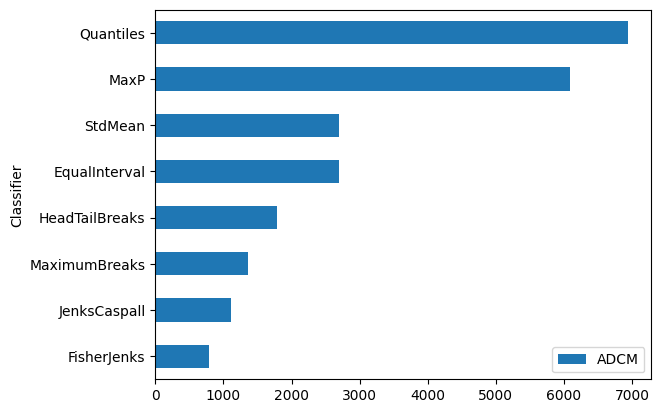

In [63]:
adcms.sort_values('ADCM').plot.barh(x='Classifier')

Let's save the best strategy:

In [64]:
MEXICO_8857['POBLACION_TOTAL_density_FJ5'] = fj5.yb

In [65]:
# there you are
MEXICO_8857[['POBLACION_TOTAL_density','POBLACION_TOTAL_density_FJ5']].head(20)

,POBLACION_TOTAL_density,POBLACION_TOTAL_density_FJ5
0,253.847400,1
1,52.750455,0
2,10.803109,0
3,16.143478,0
4,75.620684,0
5,15.121412,0
6,20.762269,0
7,129.978852,1
8,6160.497659,4
9,14.861292,0


We could create a copy of the bins to add labels:

In [66]:
# renaming
newLabelsForLevels={0:"0_VeryLow", 1:"1_Low", 2:"2_Middle", 3:"3_High", 4:"4_VeryHigh"}

MEXICO_8857['POBLACION_TOTAL_density_FJ5_cat']=MEXICO_8857.loc[:,'POBLACION_TOTAL_density_FJ5'].replace(newLabelsForLevels)

# we have
MEXICO_8857[['POBLACION_TOTAL_density','POBLACION_TOTAL_density_FJ5','POBLACION_TOTAL_density_FJ5_cat']].head(20)

,POBLACION_TOTAL_density,POBLACION_TOTAL_density_FJ5,POBLACION_TOTAL_density_FJ5_cat
0,253.847400,1,1_Low
1,52.750455,0,0_VeryLow
2,10.803109,0,0_VeryLow
3,16.143478,0,0_VeryLow
4,75.620684,0,0_VeryLow
5,15.121412,0,0_VeryLow
6,20.762269,0,0_VeryLow
7,129.978852,1,1_Low
8,6160.497659,4,4_VeryHigh
9,14.861292,0,0_VeryLow


We are ready for a discrete choropleth:

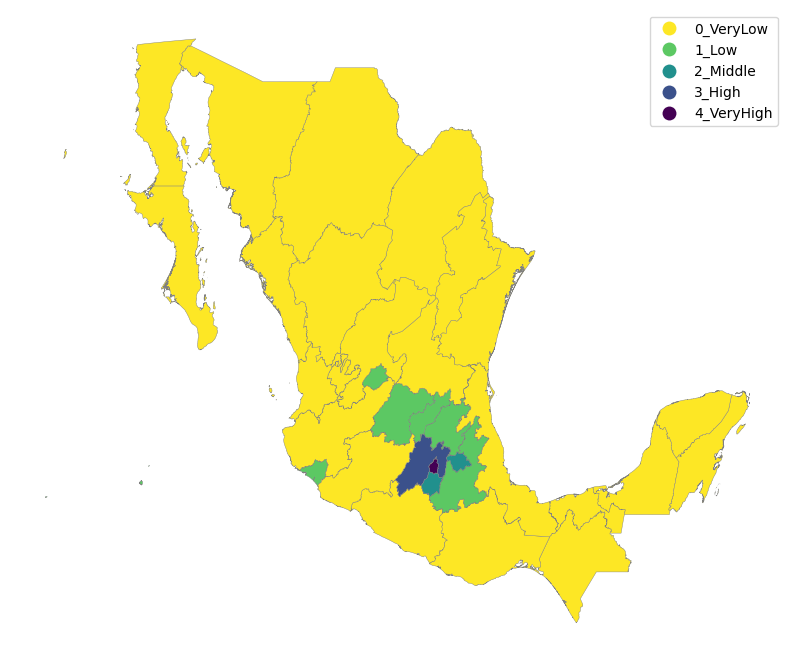

In [67]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
MEXICO_8857.plot(column='POBLACION_TOTAL_density_FJ5_cat', # variable to plot
                 cmap='viridis_r', # set of colors
                 categorical=True, # can be interpreted as category
                 edgecolor='grey', # border color
                 linewidth=0.3, # width of border
                 legend=True, # need a legend?
                 ax=ax
       )

ax.set_axis_off()

# Saving

Let's save this maps for R.

In [68]:
## Good practice to refresh your memory

## Find only GeoDataFrames in the current session
geodataframe_list = [var for var in globals() if isinstance(globals()[var], gpd.GeoDataFrame)]

print("List of GeoDataFrames in memory:")
for name in geodataframe_list:
    print(name)

List of GeoDataFrames in memory:
federaciones
_3
theMapAndData
MEXICO
MEXICO_dots
_39
MEXICO_8857
MEXICO_dots_8857
MEXICO_8857_centroids
_50
_51
MEXICO_8857_centroids_out
MEXICO_8857_centroids_no_out


These are the ones needed in R:

In [69]:
# for choropleth and base map
MEXICO_8857.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   GID_1                            32 non-null     object  
 1   GID_0                            32 non-null     object  
 2   COUNTRY                          32 non-null     object  
 3   FEDERACIONES                     32 non-null     object  
 4   VARNAME_1                        32 non-null     object  
 5   NL_NAME_1                        32 non-null     object  
 6   TYPE_1                           32 non-null     object  
 7   ENGTYPE_1                        32 non-null     object  
 8   CC_1                             32 non-null     object  
 9   HASC_1                           32 non-null     object  
 10  ISO_1                            32 non-null     object  
 11  geometry                         32 non-null     geometry
 12  PO

In [70]:
# for DDMs
MEXICO_dots_8857.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 12586 entries, 0 to 12585
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geometry  12586 non-null  geometry
dtypes: geometry(1)
memory usage: 98.5 KB


In [71]:
# for PSMs
MEXICO_8857_centroids.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   GID_1                    32 non-null     object  
 1   GID_0                    32 non-null     object  
 2   COUNTRY                  32 non-null     object  
 3   FEDERACIONES             32 non-null     object  
 4   VARNAME_1                32 non-null     object  
 5   NL_NAME_1                32 non-null     object  
 6   TYPE_1                   32 non-null     object  
 7   ENGTYPE_1                32 non-null     object  
 8   CC_1                     32 non-null     object  
 9   HASC_1                   32 non-null     object  
 10  ISO_1                    32 non-null     object  
 11  geometry                 32 non-null     geometry
 12  POBLACION_TOTAL          32 non-null     int64   
 13  AREA                     32 non-null     int64   
 14  size

In [72]:
# for PSMs
MEXICO_8857_centroids_out.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1 entries, 14 to 14
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   GID_1                    1 non-null      object  
 1   GID_0                    1 non-null      object  
 2   COUNTRY                  1 non-null      object  
 3   FEDERACIONES             1 non-null      object  
 4   VARNAME_1                1 non-null      object  
 5   NL_NAME_1                1 non-null      object  
 6   TYPE_1                   1 non-null      object  
 7   ENGTYPE_1                1 non-null      object  
 8   CC_1                     1 non-null      object  
 9   HASC_1                   1 non-null      object  
 10  ISO_1                    1 non-null      object  
 11  geometry                 1 non-null      geometry
 12  POBLACION_TOTAL          1 non-null      int64   
 13  AREA                     1 non-null      int64   
 14  size     

In [73]:
# for PSMs
MEXICO_8857_centroids_no_out.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 31 entries, 0 to 31
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   GID_1                    31 non-null     object  
 1   GID_0                    31 non-null     object  
 2   COUNTRY                  31 non-null     object  
 3   FEDERACIONES             31 non-null     object  
 4   VARNAME_1                31 non-null     object  
 5   NL_NAME_1                31 non-null     object  
 6   TYPE_1                   31 non-null     object  
 7   ENGTYPE_1                31 non-null     object  
 8   CC_1                     31 non-null     object  
 9   HASC_1                   31 non-null     object  
 10  ISO_1                    31 non-null     object  
 11  geometry                 31 non-null     geometry
 12  POBLACION_TOTAL          31 non-null     int64   
 13  AREA                     31 non-null     int64   
 14  size     

The file **africa_8857.gpkg** will keep all those maps as layers!

In [74]:
MEXICO_8857.to_file("africa_8857.gpkg",driver='GPKG',layer='continent')
MEXICO_dots_8857.to_file("africa_8857.gpkg",driver='GPKG',layer='population_ddm')
MEXICO_8857_centroids.to_file("africa_8857.gpkg",driver='GPKG',layer='population_psm')
MEXICO_8857_centroids_out.to_file("africa_8857.gpkg",driver='GPKG',layer='outlier_population_psm')
MEXICO_8857_centroids_no_out.to_file("africa_8857.gpkg",driver='GPKG',layer='no_outlier_population_psm')